In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
# A fully connected layer used in neural networks
from tensorflow.keras.layers import Dense
# A widely used optimizer that adjusts learning rate during training.
from tensorflow.keras.optimizers import Adam


In [17]:
# Define the target function
def target_function(x):
    return 5 * x**3 - 8 * x**2 - 7 * x + 5

# Generate x values between -15 to +15
x = np.linspace(-15, 15, 1500)
y = target_function(x)


In [18]:
# b) Normalize input data to [-1, 1]
x_min, x_max = x.min(), x.max()
x_normalized = 2 * (x - x_min) / (x_max - x_min) - 1

# Reshape for Keras input (2D)
x_normalized = x_normalized.reshape(-1, 1)
y = y.reshape(-1, 1)


In [19]:
# Split test data (8%)
x_train_full, x_test, y_train_full, y_test = train_test_split(
    x_normalized, y, test_size=0.08, random_state=42
)

# Split validation data (8% of full set)
x_train, x_val, y_train, y_val = train_test_split(
    x_train_full, y_train_full, test_size=0.08, random_state=42
)


In [20]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(1,)),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1)  # Output layer
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Display model architecture
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 32)                64        
                                                                 
 dense_9 (Dense)             (None, 64)                2112      
                                                                 
 dense_10 (Dense)            (None, 128)               8320      
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 10,625
Trainable params: 10,625
Non-trainable params: 0
_________________________________________________________________


In [21]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=100,
    batch_size=32,
    verbose=1
)


Epoch 1/100
40/40 [==============================] - 1s 10ms/step - loss: 41362936.0000 - val_loss: 36801200.0000
Epoch 2/100
40/40 [==============================] - 0s 9ms/step - loss: 41310540.0000 - val_loss: 36709456.0000
Epoch 3/100
40/40 [==============================] - 0s 6ms/step - loss: 41043048.0000 - val_loss: 36305380.0000
Epoch 4/100
40/40 [==============================] - 0s 5ms/step - loss: 40160860.0000 - val_loss: 35124344.0000
Epoch 5/100
40/40 [==============================] - 0s 7ms/step - loss: 38031988.0000 - val_loss: 32543966.0000
Epoch 6/100
40/40 [==============================] - 0s 5ms/step - loss: 33860736.0000 - val_loss: 28162062.0000
Epoch 7/100
40/40 [==============================] - 0s 5ms/step - loss: 27627636.0000 - val_loss: 22023716.0000
Epoch 8/100
40/40 [==============================] - 0s 3ms/step - loss: 20257920.0000 - val_loss: 15473147.0000
Epoch 9/100
40/40 [==============================] - 0s 4ms/step - loss: 13823161.0000 - val_lo

4/4 [==============================] - 0s 6ms/step


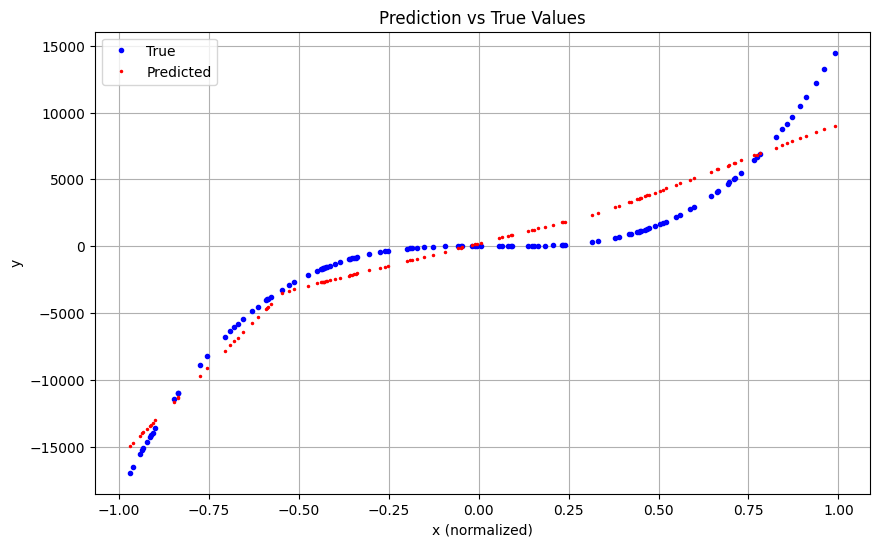

In [22]:
# Predict using test data
y_pred = model.predict(x_test)

# Plot true vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(x_test, y_test, 'bo', markersize=3, label='True')
plt.plot(x_test, y_pred, 'r.', markersize=3, label='Predicted')
plt.xlabel('x (normalized)')
plt.ylabel('y')
plt.title('Prediction vs True Values')
plt.legend()
plt.grid(True)
plt.show()
